In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import pickle as pkl

## Plot a sample

In [3]:
test_data = np.load(os.path.join("./data", "test_apnea_data.npz"))
test_X, test_y = test_data['samples'], test_data['labels']

In [6]:
test_X.shape

(6000, 1701)

In [7]:
sample_idx = 0

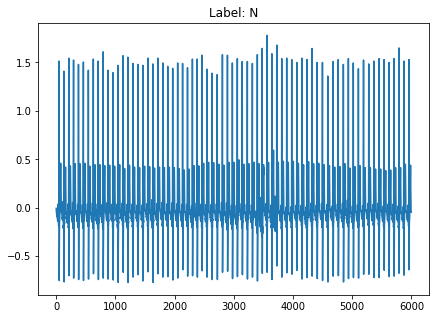

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
sample = test_X[:, sample_idx]
ax.plot(sample)
ax.set_title("Label: N")
plt.savefig("sample.png", dpi=300)

## Plot weights as a function of distance

In [52]:
def dist(a, b):
  return np.square(a - b)

In [53]:
i = 1
xs = list(range(2,50))

In [54]:
ws = []
sigma_sq = 500.0
for x in xs:
    w = np.exp((- dist(i, x)) / sigma_sq)
    ws.append(w)

In [55]:
dists = np.array(xs) - i

In [56]:
dists = np.concatenate((-np.flip(dists), dists))

In [57]:
len(dists)

96

In [58]:
ws = np.concatenate((np.flip(ws), ws))

In [59]:
len(ws)

96

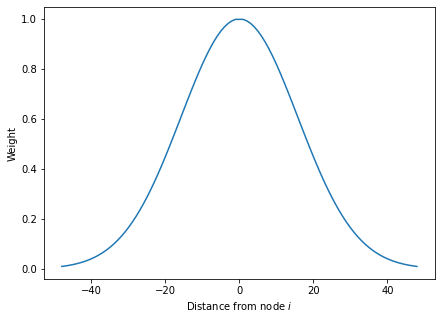

In [66]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(dists, ws)
ax.set_ylabel("Weight")
ax.set_xlabel("Distance from node " + r'$i$')
plt.savefig("weights.png", dpi=300)

## Plot results

In [2]:
# import cnn results
cnn = pd.read_csv("./res/cnn.csv")

In [3]:
cnn_acc = cnn["val_acc"].to_numpy()[1::2]

In [4]:
len(cnn_acc)

50

In [5]:
cnn_acc *= 100

In [76]:
# import cgcnn results
with open("./res/graph_cnn.pkl", "rb") as f:
    graph_cnn = pkl.load(f)

In [77]:
graph_cnn_acc = graph_cnn["acc"]

In [78]:
# import ff results
with open("./res/ff.pkl", "rb") as f:
    ff = pkl.load(f)

In [79]:
ff[3]

{'train/loss_step': tensor(0.0002),
 'train/loss_epoch': tensor(0.0003),
 'test/loss_step': tensor(3.9580),
 'test/acc_step': tensor(0.5451),
 'test/loss_epoch': tensor(3.9316),
 'test/acc_epoch': tensor(0.5526)}

In [80]:
ff_acc = []
for i in range(len(ff)):
    if i > 0:
        ff_acc.append(ff[i]["test/acc_step"].item())

In [81]:
ff_acc = np.array(ff_acc) * 100

In [82]:
len(ff_acc)

50

In [83]:
xs = np.arange(101)[2::2]

In [84]:
xs

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [85]:
len(xs)

50

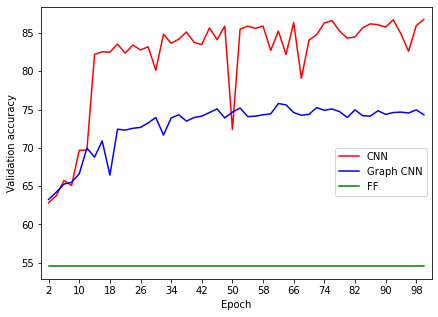

In [96]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(xs, cnn_acc, c="red", label="CNN")
ax.plot(xs, graph_cnn_acc, c="blue", label="Graph CNN")
ax.plot(xs, ff_acc, c="green", label="FF")
ax.set_xlim(0, 102)
ax.set_xticks(np.arange(2, 101, 8))
ax.set_ylabel("Validation accuracy")
ax.set_xlabel("Epoch")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("val_acc.png", dpi=300)